# Classification

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare data for model building

In [3]:
df = pd.read_csv('../../data_sets/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# TotalCharges is an object, however should be a number
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# shows only 11 records null for TotalCharges, so just get rid of them

# drop any null values
df.dropna(how='any', inplace=True)

In [9]:
df.Churn.value_counts()/len(df)*100
# see that 73% stay, 27% churn

Churn
No     73.421502
Yes    26.578498
Name: count, dtype: float64

In [10]:
# Divide data into x and y variables. y = churn

X = df.drop(['customerID', 'Churn'], axis=1)
y = df.Churn.values

In [11]:
# Feature Encoding: Convert categorical features into numericals
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [12]:
X = pd.get_dummies(X, columns=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [13]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,False,True,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,True,False,False,True,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,True,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,True,False,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,False,False,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False


In [14]:
bool_cols = X.select_dtypes(include='bool').columns
X[bool_cols] = X[bool_cols].astype(int)

In [15]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [16]:
# Divide data into Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [17]:
# Feature Scaling: Standardation and Normalation

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [18]:
X_train_sc

array([[-0.44140074,  1.1256711 , -0.16154623, ..., -0.51924912,
        -0.71738884,  1.82386873],
       [-0.44140074,  0.1857496 , -0.31939136, ..., -0.51924912,
        -0.71738884,  1.82386873],
       [-0.44140074,  1.49346647,  0.4831265 , ...,  1.92585788,
        -0.71738884, -0.54828507],
       ...,
       [-0.44140074, -1.16283342, -1.47249154, ..., -0.51924912,
        -0.71738884,  1.82386873],
       [-0.44140074,  1.33000186, -0.3160683 , ..., -0.51924912,
        -0.71738884,  1.82386873],
       [-0.44140074,  1.45260032,  0.89850841, ..., -0.51924912,
         1.39394417, -0.54828507]], shape=(5274, 30))

## kNN Classifier

In [19]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_sc, y_train)

KNeighborsClassifier()

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
y_pred = model.predict(X_test_sc)

In [21]:
y_pred

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'],
      shape=(1758,), dtype=object)

In [22]:
y_test

array(['No', 'No', 'Yes', ..., 'No', 'No', 'No'],
      shape=(1758,), dtype=object)

In [23]:
# calculate accuracy. basic model, no parameter optimization

from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred)*100)

75.65415244596132


### Making predictions from new data

In [24]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
1352,0,72,60.95,4549.05,1,1,1,0,1,0,...,0,1,0,1,0,1,0,0,0,0
3536,0,1,79.15,79.15,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,1
1327,0,59,99.50,5961.10,1,1,0,1,0,1,...,0,1,0,1,1,0,1,0,0,0
578,1,35,94.55,3365.40,1,1,0,1,0,1,...,0,0,0,1,0,0,1,0,1,0
2095,0,1,79.95,79.95,1,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2494,0,35,75.35,2636.05,1,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
6268,0,22,20.85,450.65,0,0,0,1,0,0,...,1,0,1,0,1,0,0,0,0,0
1258,0,47,20.15,1046.20,0,0,0,1,0,0,...,1,0,1,0,0,1,0,0,0,1
5418,1,18,80.55,1411.65,1,0,0,1,0,1,...,0,0,0,0,0,0,1,1,0,0


In [25]:
data = [[0,2,87,178,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1]]
data_sc = sc.transform(data)
single = model.predict(data_sc)
print(single)

['Yes']


/Users/stevesimonson/development/tutorials/PythonforDS/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [26]:
# probability prediction
probability = model.predict_proba(data_sc)
print(probability)

# 80% chance of customer churning

[[0.4 0.6]]


## Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(max_depth=4, criterion='entropy')

model_dt.fit(X_train_sc, y_train)

,criterion,'entropy'
,splitter,'best'
,max_depth,4
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [34]:
y_pred_dt = model_dt.predict(X_test_sc)

In [35]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test,y_pred_dt)*100)

# scores worse than kNN without any hyperparameter optimization

78.839590443686


## SVM

In [36]:
from sklearn.svm import SVC

# create and train model
model_svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)  
model_svm.fit(X_train_sc, y_train)

# predict
y_pred_svm = model_svm.predict(X_test_sc)

# evaluate
accuracy = accuracy_score(y_test, y_pred_svm) * 100
print(f"SVM Accuracy: {accuracy:.2f}%")


SVM Accuracy: 79.52%


## Visualization

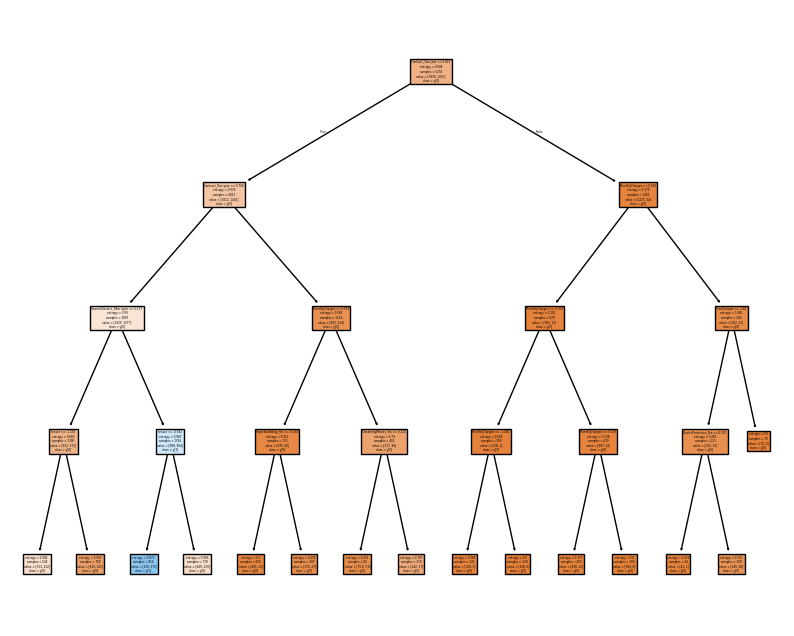

In [44]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plot_tree(model_dt, filled=True, feature_names = X_train.columns, class_names=True)
plt.show()

# add max_depth=4 to DecisionTreeClassifier() above to limit the number of nodes shown. otherwise
# it will render the entire tree and take minutes.

# praphviz
# dtreeviz


In [47]:
%pip install graphviz


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model_dt, out_file='tree.dot', feature_names=X_train.columns, class_names=True, filled=True, proportions=True, special_characters=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graph = graph.Source(dot_graph, format='png')

TypeError: got an unexpected keyword argument 'proportions'

In [49]:
import export_graphviz
import graphviz

export_graphviz(model_dt, out_file='tree.dot', feature_names=X_train.columns, class_names=True, filled=True, proportions=True, special_characters=True)

with open('tree.dot') as f:
    dot_graph = f.read()
graph = graph.Source(dot_graph, format='png')

ModuleNotFoundError: No module named 'export_graphviz'